In [2]:
# Load spacy model'
import spacy
nlp = spacy.load('en_core_web_sm')
# Plain text
text = "zohre going to class"
# Process plain text with spacy
doc = nlp(text)

In [3]:
import textacy
triples = list(textacy.extract.subject_verb_object_triples(doc))
print(triples)

[SVOTriple(subject=[zohre], verb=[going], object=[to, class])]


In [4]:
import networkx as nx

# Now you can use the functions and classes from the 'nx' module
# For example:
G = nx.Graph()


In [5]:
nodes = []
relations = []
# iterate over the triples
for triple in triples:
    # extract the Subject and Object from triple
    node_subject = "_".join(map(str, triple.subject))
    node_object  = "_".join(map(str, triple.object))
    nodes.append(node_subject)
    nodes.append(node_object)
    # extract the relation between S and O
    # add the attribute 'action' to the relation
    relation = "_".join(map(str, triple.verb))
    relations.append((node_subject,node_object,{'action':relation}))
# remove duplicate nodes
nodes = list(set(nodes))
print(nodes)
print(relations)


['zohre', 'to_class']
[('zohre', 'to_class', {'action': 'going'})]


In [6]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relations)

C:\Users\zohreh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


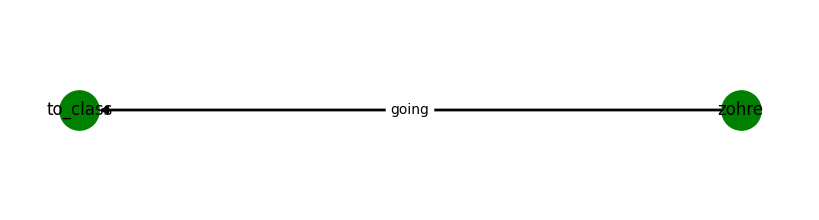

In [7]:
import matplotlib.pyplot as plt
# extract the attribute 'action' from edges
edge_attribute = nx.get_edge_attributes(G, 'action')
edges, weights = zip(*edge_attribute.items())
# resize figure
plt.rcParams["figure.figsize"] = [8, 2]
plt.rcParams["figure.autolayout"] = True
# set figure layout
pos = nx.circular_layout(G)
# draw graph
nx.draw(G, pos, node_color='g', width=2, with_labels=True,node_size = 800)
# draw edge attributes
nx.draw_networkx_edge_labels(G, pos,edge_attribute, label_pos=0.5)
 
plt.show()